In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")

## Places

In [3]:
places_cnt = pd.Series()
for places in texts_df["places"]:
    for place in places:
        if place not in places_cnt:
            places_cnt[place] = 1
        else:
            places_cnt[place] += 1
print('Number of unique places: ' + str(len(places_cnt)))
print('Number of places occurring more than once: ' + str(len(places_cnt[places_cnt>1])))

Number of unique places: 1587
Number of places occurring more than once: 510


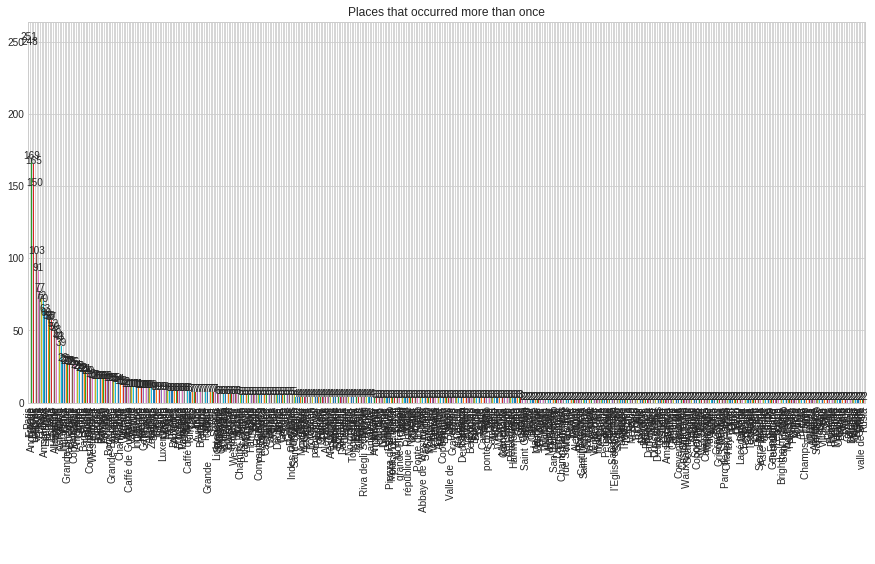

In [4]:
ax = places_cnt[places_cnt>1].sort_values(ascending=False) \
    .plot(kind="bar", figsize=(15, 7),title='Places that occurred more than once')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=10)

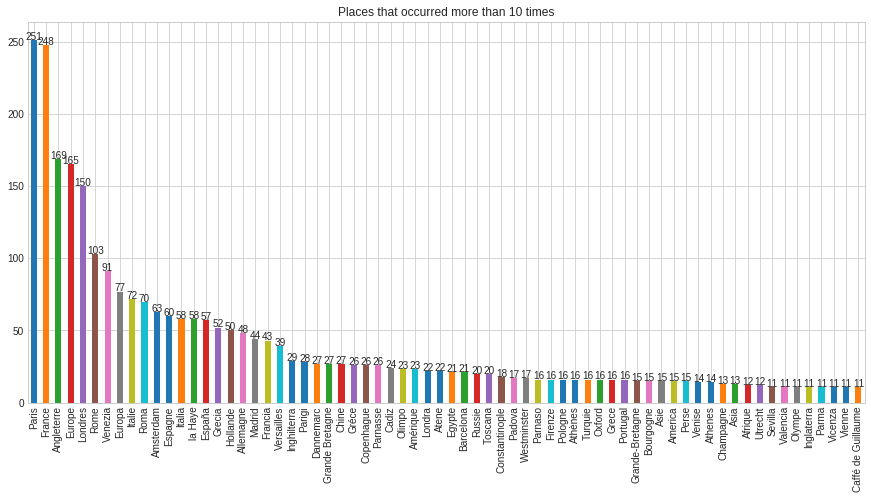

In [5]:
ax = places_cnt[places_cnt>10].sort_values(ascending=False).plot(kind="bar", figsize=(15, 7),title='Places that occurred more than 10 times')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=10)

In [6]:
places_df=texts_df
places_short=places_cnt[places_cnt>10]
for place in places_short.index:
    places_df[place]=0
for row in range(len(places_df)):
    for place in places_df['places'].iloc[row]:
        if place in set(places_short.index):
            places_df.loc[places_df.index[row],place]=1

In [7]:
reduced_places_df=places_df[['filename','language'] + list(places_short.index)]
reduced_places_df.head()

,filename,language,Amsterdam,la Haye,Paris,France,España,Roma,Inglaterra,Francia,...,Parnaso,Parnasse,Parma,Venise,Perse,Inghilterra,Vienne,Athènes,Pologne,Athenes
0,mws.6497.xml,French,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mws.6497.xml,French,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mws.6497.xml,French,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


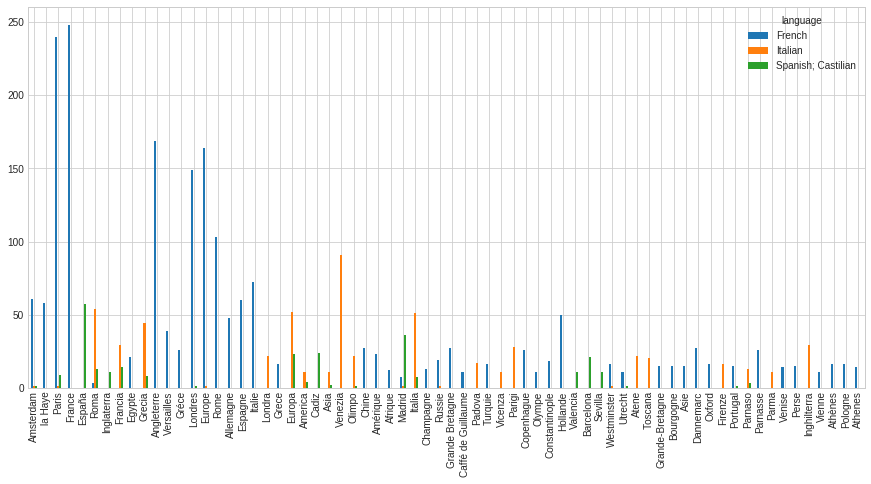

In [8]:
language_places=reduced_places_df.groupby(['language']).sum()
language_places.head()
language_places.T[['French','Italian','Spanish; Castilian']].plot(kind='bar', figsize=(15, 7))

### Places co-occurring in files

In [9]:
import networkx as nx
import numpy as np

In [10]:
file_places_df=reduced_places_df.groupby(['filename']).sum()
B=file_places_df.values
A=np.matmul(np.transpose(B),B)

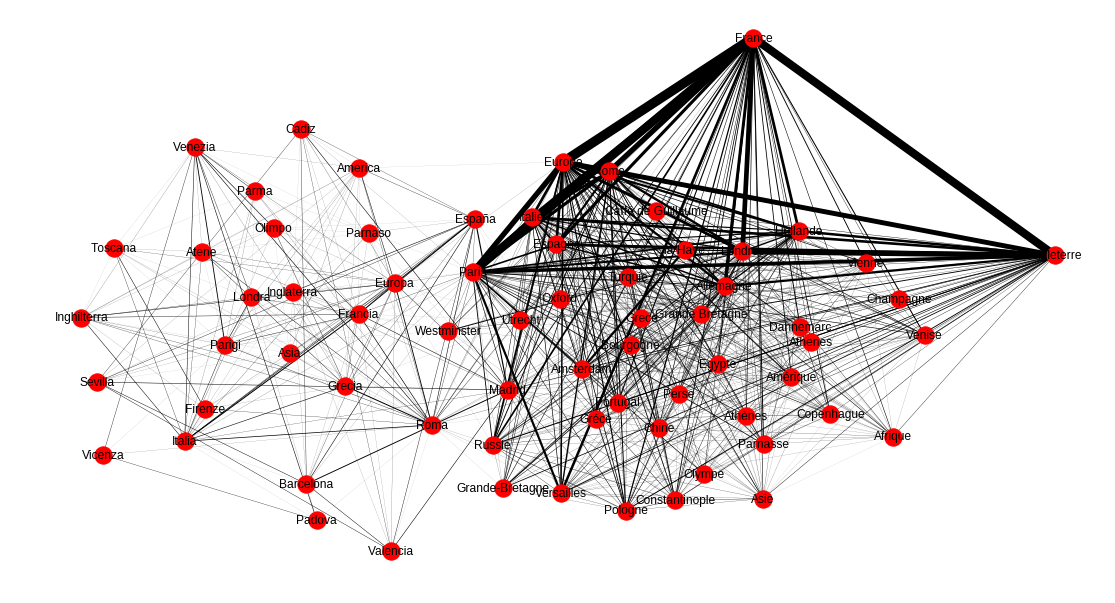

In [11]:
placesG = nx.from_numpy_matrix(A)
placesG.nodes
mapping = dict(zip(placesG, file_places_df.columns))
placesG = nx.relabel_nodes(placesG, mapping)
weights=[0.05*placesG[u][v]['weight'] for u,v in placesG.edges]

plt.figure(figsize=(15,8))
nx.draw_kamada_kawai(placesG,with_labels=True,width=weights)
plt.show()

In [12]:
places_cnt.sort_index()

 América                                                    1
(Lyon)                                                      1
6255148::Europe                                             1
:Paris                                                      1
:Venezia                                                    1
Abbaye de Westminster                                       3
Abbaye de Westmunster                                       1
Abbaïe\n                                d’Westminster       1
Abbaïe de la\n                                    Trape     1
Abdera                                                      2
Abruzzo                                                     1
Acate                                                       1
Acheronte                                                   4
Affrica                                                     7
Africa                                                      5
Afrique                                                    12
Aia     

Merging identical places that just have different names in different languages. *This needs to be done on the entire 1.5k!*

In [13]:
placesG = nx.contracted_nodes(placesG,'France','Francia')
placesG = nx.contracted_nodes(placesG,'Inglaterra','Inghilterra')
placesG = nx.contracted_nodes(placesG,'Inglaterra','Angleterre')
placesG = nx.contracted_nodes(placesG,'Parnaso','Parnasse')
placesG = nx.contracted_nodes(placesG,'España','Espagne')
placesG = nx.contracted_nodes(placesG,'Roma','Rome')
placesG = nx.contracted_nodes(placesG,'Grecia','Gréce')
placesG = nx.contracted_nodes(placesG,'Grecia','Grece')
placesG = nx.contracted_nodes(placesG,'Londres','Londra')
placesG = nx.contracted_nodes(placesG,'America','Amérique')
placesG = nx.contracted_nodes(placesG,'Atene','Athènes')
placesG = nx.contracted_nodes(placesG,'Atene','Athenes')
placesG = nx.contracted_nodes(placesG,'Italia','Italie')
placesG = nx.contracted_nodes(placesG,'Grande-Bretagne','Grande Bretagne')
placesG = nx.contracted_nodes(placesG,'Venezia','Venise')
placesG = nx.contracted_nodes(placesG,'Asie','Asia')
placesG = nx.contracted_nodes(placesG,'Europa','Europe')

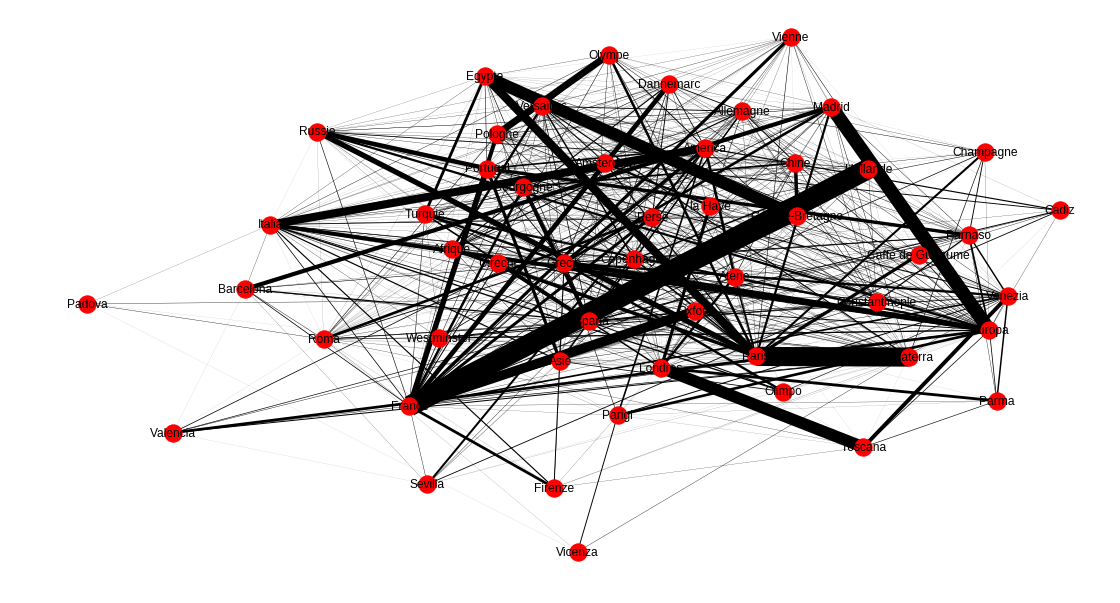

In [14]:
plt.figure(figsize=(15,8))
nx.draw_kamada_kawai(placesG,with_labels=True,width=weights)
plt.show()

## Works

In [15]:
works_cnt = pd.Series()
for works in texts_df["works"]:
    for work in works:
        if work not in works_cnt:
            works_cnt[work] = 1
        else:
            works_cnt[work] += 1
print('Number of unique works: ' + str(len(works_cnt)))
print('Number of works occurring more than once: ' + str(len(works_cnt[works_cnt>1])))

Number of unique works: 1380
Number of works occurring more than once: 222


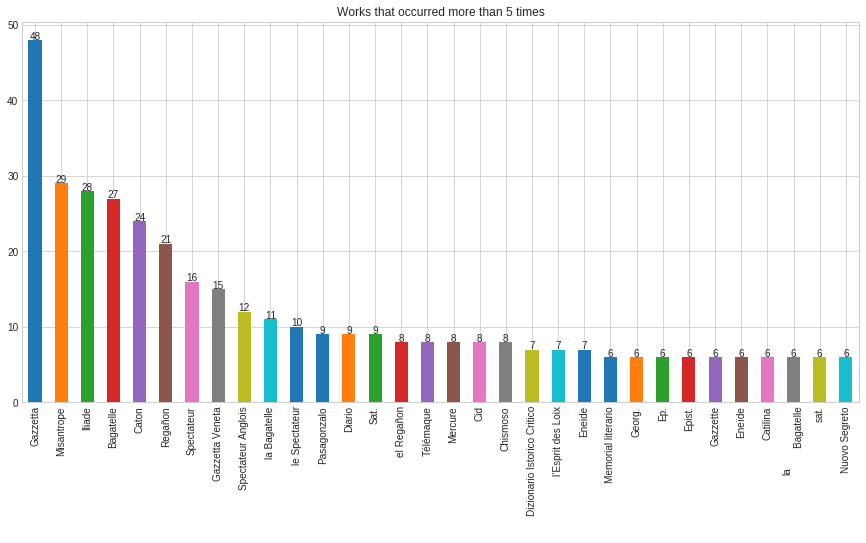

In [16]:
ax = works_cnt[works_cnt>5].sort_values(ascending=False) \
    .plot(kind="bar", figsize=(15, 7),title='Works that occurred more than 5 times')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=10)

In [17]:
works_df=texts_df
works_short=works_cnt[works_cnt>5]
for work in works_short.index:
    works_df[work]=0
for row in range(len(places_df)):
    for work in works_df['works'].iloc[row]:
        if work in set(works_short.index):
            works_df.loc[works_df.index[row],work]=1
            
reduced_works_df=works_df[['filename','language'] + list(works_short.index)]
reduced_works_df.head()

,filename,language,Misantrope,sat.,Caton,Iliade,Spectateur,Bagatelle,Gazzetta Veneta,Gazzetta,...,Epist.,Gazzette,Cid,Eneïde,la Bagatelle,Eneide,Catilina,la Bagatelle,l’Esprit des Loix,Nuovo Segreto
0,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,mws.6497.xml,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


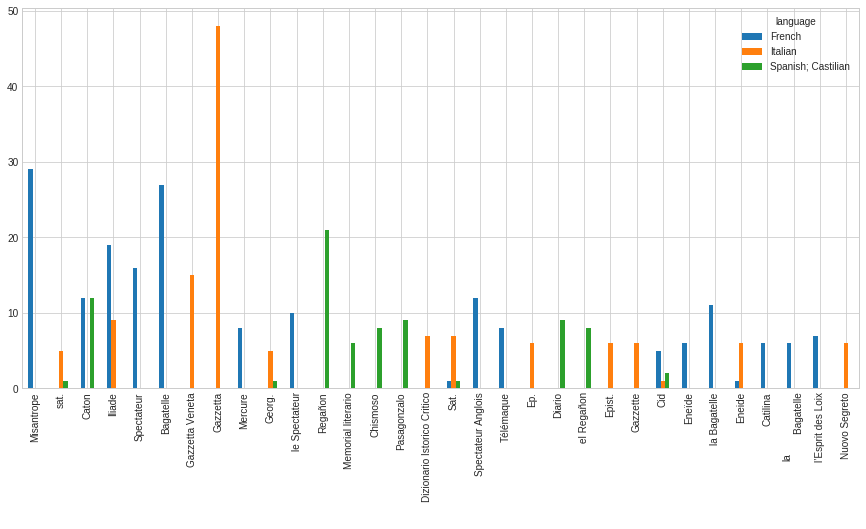

In [18]:
language_works=reduced_works_df.groupby(['language']).sum()
language_works.T[['French','Italian','Spanish; Castilian']].plot(kind='bar', figsize=(15, 7))

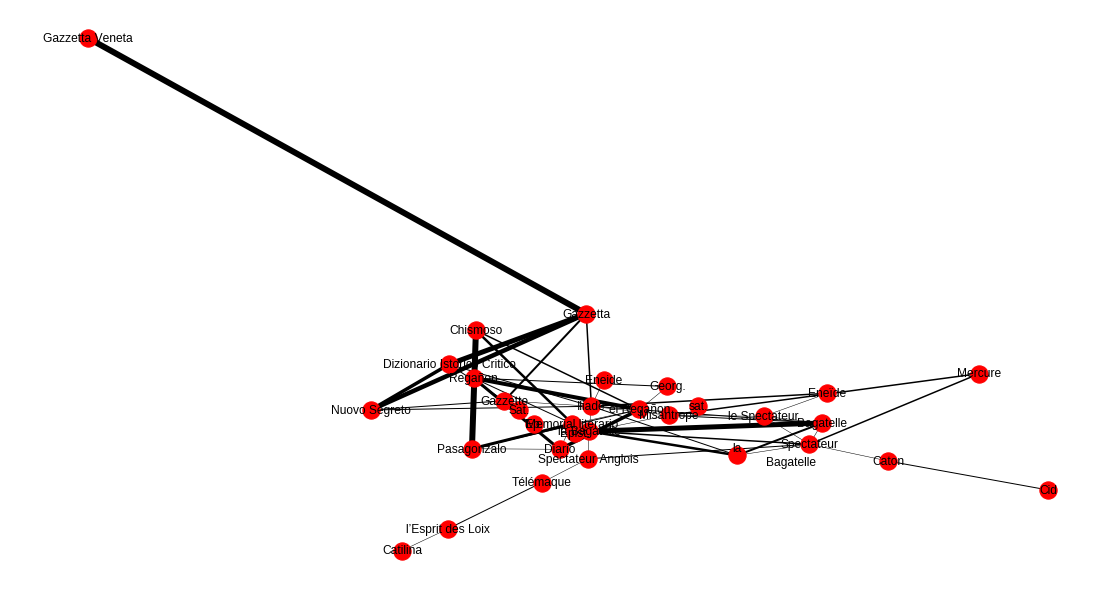

In [19]:
file_works_df=reduced_works_df.groupby(['filename']).sum()
B=file_works_df.values
A=np.matmul(np.transpose(B),B)

worksG = nx.from_numpy_matrix(A)
worksG.nodes
mapping = dict(zip(worksG, file_works_df.columns))
worksG = nx.relabel_nodes(worksG, mapping)
weights=[0.5*worksG[u][v]['weight'] for u,v in worksG.edges]

plt.figure(figsize=(15,8))
nx.draw_kamada_kawai(worksG,with_labels=True,width=weights)
plt.show()

## Persons

In [20]:
persons_cnt = pd.Series()
for persons in texts_df["persons"]:
    for person in persons:
        if person not in persons_cnt:
            persons_cnt[person] = 1
        else:
            persons_cnt[person] += 1
print('Number of unique persons: ' + str(len(persons_cnt)))
print('Number of persons occurring more than once: ' + str(len(persons_cnt[persons_cnt>1])))

Number of unique persons: 7964
Number of persons occurring more than once: 2288


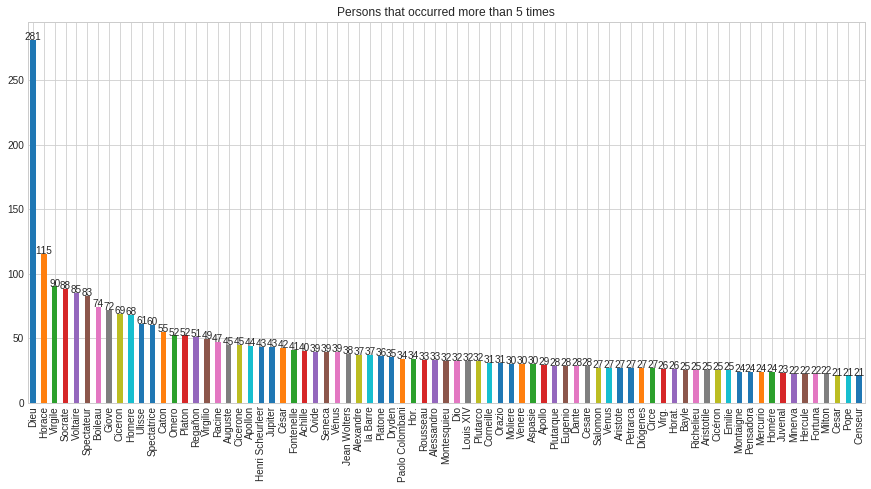

In [21]:
ax = persons_cnt[persons_cnt>20].sort_values(ascending=False) \
    .plot(kind="bar", figsize=(15, 7),title='Persons that occurred more than 5 times')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=10)